# Artificial Intelligence exam project

Initial imports:

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *
from heuristic_GG import *
from heuristic_FD import *

In [2]:
state = env.reset()
env.render() 
print(env.actions)


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                --------------------                            
                                |.................Z|                            
                                |.@...............Z|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                                |..................|                            
                           

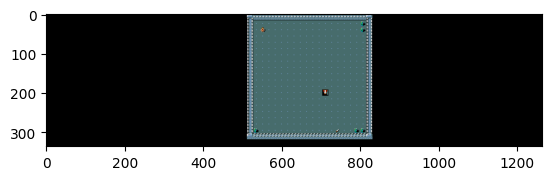

In [3]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [4]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
weapons = get_weapon_location(game_map)
print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))

Agent position: (2, 34)
Target position: (12, 44)
Monster position: [(1, 50), (2, 50), (18, 33), (18, 49), (18, 50)]


[**********------]


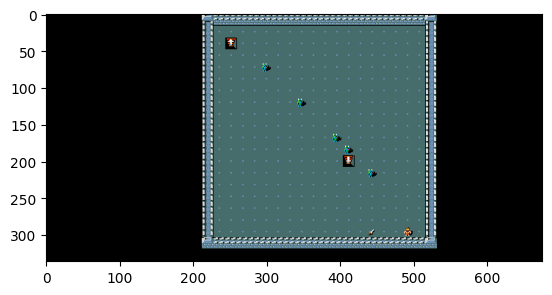

In [ ]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

#finchè non arriviamo alla soluzione
end_state=False
hp_rate = 1
weapon_in_hand = False
while not end_state:
    # sceglie la cella migliore in base al valore calcolato sulla cella dall'euristica
    current_position=get_player_location(game_map)
    coord=get_best_move(game_map, current_position, end_target, heuristic_gg, hp_rate, weapon_in_hand)
    #print('hp_player: ', hp)

    # raccoglie l'arma se si trova sopra di essa
    if len(weapons)>0 and not(weapon_in_hand) and current_position in weapons: # if i'm on a weapon
        pickup() # pick up the weapon
        wield()  # wield it
        weapon_in_hand = True
    
    #stampa e aggiornamento passo
    game_map, x, end_state, y = env.step(actions_from_path(current_position,[coord])[0])
    hp=game_map["blstats"][10]
    max_hp=game_map["blstats"][11]
    if hp>0:
        hp_rate = (hp/max_hp)
    print("[" + "*" * hp + "-" * (max_hp-hp) + "]")
    game_map=plot_map(game_map,image)
    player_moves.append(coord)
    
# lista passi effettuati
sol = actions_from_path(player_moves[0], player_moves[1:])

